Gemini Pro - Python

In [ ]:
api = 'Your-API-KEY'

In [ ]:
pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 15.0 MB/s eta 0:00:00


In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
genai.configure(api_key=api)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


Chat Conversation

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [ ]:
response = chat.send_message("Hey, Can you explain about neural network in one line")
to_markdown(response.text)

> Neural networks are a series of algorithms that endeavor to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

In [ ]:
response = chat.send_message("Give top 5 trending news")
to_markdown(response.text)

> 1. **Russia-Ukraine War: Intense Fighting Continues in Eastern Ukraine:**
>    - Heavy clashes reported in the Donbas region, particularly around the cities of Bakhmut and Soledar.
>    - Russian forces reportedly making incremental gains but facing strong Ukrainian resistance.
>    - International concerns grow over the escalating conflict and its impact on global security.
> 
> 2. **U.S. Inflation Rate Hits 40-Year High:**
>    - U.S. inflation rate surges to 7.5% in January, the highest since February 1982.
>    - Rising energy and food prices, along with supply chain disruptions, are key factors driving inflation.
>    - Federal Reserve expected to raise interest rates to combat inflation, potentially slowing economic growth.
> 
> 3. **James Webb Space Telescope Begins Science Operations:**
>    - The James Webb Space Telescope (JWST) successfully completes its commissioning phase and begins its science mission.
>    - JWST captures stunning images of distant galaxies, providing new insights into the early universe.
>    - Scientists anticipate groundbreaking discoveries in astronomy and cosmology using the telescope's advanced capabilities.
> 
> 4. **Omicron Subvariant BA.2 Becomes Dominant COVID-19 Strain:**
>    - The Omicron subvariant BA.2 is now the dominant COVID-19 strain in many countries, including the United States and Europe.
>    - BA.2 is more transmissible than the original Omicron variant but appears to cause similar symptoms and severity of illness.
>    - Health experts emphasize the importance of vaccination and booster shots to protect against severe COVID-19.
> 
> 5. **Meta (Facebook) Announces Metaverse Plans and Rebranding:**
>    - Meta (formerly Facebook) unveils its vision for the metaverse, a virtual world where people can interact, work, and play.
>    - The company invests heavily in virtual reality (VR) and augmented reality (AR) technologies to create immersive experiences.
>    - Meta faces challenges in addressing privacy concerns, regulatory issues, and user adoption of its metaverse platform.

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: Hey, Can you explain about neural network in one line

> **model**: Neural networks are a series of algorithms that endeavor to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

> **user**: Give top 5 trending news

> **model**: 1. **Russia-Ukraine War: Intense Fighting Continues in Eastern Ukraine:**
>    - Heavy clashes reported in the Donbas region, particularly around the cities of Bakhmut and Soledar.
>    - Russian forces reportedly making incremental gains but facing strong Ukrainian resistance.
>    - International concerns grow over the escalating conflict and its impact on global security.
> 
> 2. **U.S. Inflation Rate Hits 40-Year High:**
>    - U.S. inflation rate surges to 7.5% in January, the highest since February 1982.
>    - Rising energy and food prices, along with supply chain disruptions, are key factors driving inflation.
>    - Federal Reserve expected to raise interest rates to combat inflation, potentially slowing economic growth.
> 
> 3. **James Webb Space Telescope Begins Science Operations:**
>    - The James Webb Space Telescope (JWST) successfully completes its commissioning phase and begins its science mission.
>    - JWST captures stunning images of distant galaxies, providing new insights into the early universe.
>    - Scientists anticipate groundbreaking discoveries in astronomy and cosmology using the telescope's advanced capabilities.
> 
> 4. **Omicron Subvariant BA.2 Becomes Dominant COVID-19 Strain:**
>    - The Omicron subvariant BA.2 is now the dominant COVID-19 strain in many countries, including the United States and Europe.
>    - BA.2 is more transmissible than the original Omicron variant but appears to cause similar symptoms and severity of illness.
>    - Health experts emphasize the importance of vaccination and booster shots to protect against severe COVID-19.
> 
> 5. **Meta (Facebook) Announces Metaverse Plans and Rebranding:**
>    - Meta (formerly Facebook) unveils its vision for the metaverse, a virtual world where people can interact, work, and play.
>    - The company invests heavily in virtual reality (VR) and augmented reality (AR) technologies to create immersive experiences.
>    - Meta faces challenges in addressing privacy concerns, regulatory issues, and user adoption of its metaverse platform.

Image Analysis

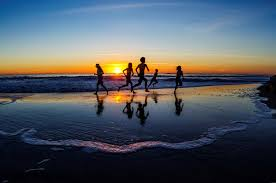

In [ ]:
import PIL.Image

img = PIL.Image.open('images.jpeg')
img

In [ ]:
new_size = (200, 200)
img = img.resize(new_size)

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

Markdown(response.text)

 The picture shows a family of five, running on the beach. The sun is setting in the background. The family is silhouetted against the sky. The picture is taken from a low angle, which makes the family look larger than life. The picture is full of movement and energy. It captures the joy and happiness of a family spending time together.